# Running Elegant with XOPT + Archiving

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [3]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/elegant_example/elegant_particles.txt
    sample_interval: 1000
    elename: LCLS2cuH.ele #Note this will make a new file 'run<elename>.ele' and modify the path_search etc below in that new file
    ltename: LCLS2cuH.lte
    ELEGANT_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant
    HDF5_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensions/bin/linux-x86_64/sdds2hdf
    path_search: /global/homes/a/aedelen/GitHub/lcls-lattice/elegant, /global/homes/a/aedelen/GitHub/lcls-lattice/elegant/rmat,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/wakefields,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/beams
    finput_name: HXRSTART.out
    foutput_name: HXRSTART.h5
  #  timeout: 180
    

"""



In [4]:
X = Xopt(YAML)

Loading config as text


In [5]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_1

## Do one run with random inputs

In [6]:
X.random_evaluate()

/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant runLCLS2cuH-Copy2.ele -macro=L1_9_50_phase=55.193609562102495  -macro=L1_9_25_phase=66.04620377389058  -macro=L1_10_25_phase=60.825562149513566  -macro=X1_Xband_phase=-108.07560747332406  -macro=L2_10_25_phase=39.558351229207034  -macro=L3_10_25_volt=16628471.874  -macro=L3_10_50_volt=16628471.874  -macro=X_MAX=0.005  -macro=DX=0.0011  -macro=DP=0.00016  -macro=INPUT_FILE=/global/u2/a/aedelen/elegant_example/elegant_particles.txt  -macro=sample_interval=1000  -macro=L2_10_50_phase=39.558351229207034 


{'sigma_pz': 56529446.83790724,
 'norm_emit_x': 1.1103119749153686e-06,
 'sigma_t': 6.110431702796528e-13,
 'mean_pz': 4911255876.191293,
 'charge': 1.0619999999999999e-10,
 'ptp_t': 2.1176788714464645e-12,
 'core_norm_emit_x': 2.931114978343338e-07,
 'core_pz': 1036973.2989346286,
 'core_current': 67.15915317661137,
 'archive': './output/beams/elegant_sim_65346afacf5b9ef00a968bbef72a5b14.h5'}

In [7]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_1

## Run GA

In [8]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [9]:
# Change max generations
X.algorithm['options']['max_generations'] = 3
X.run(executor=executor)

Starting at time 2020-11-11T15:28:25-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'ELEGANT_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant',
               'HDF5_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensio

In [10]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [11]:
#X.evaluate(settings)

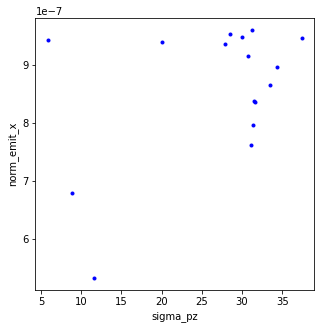

In [12]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Data from Json

In [13]:
from xopt.dataset import load_all_xopt_data

In [14]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_2.json', 'output/gen_3.json', 'output/gen_1.json']

In [15]:
DAT = load_all_xopt_data(jlist)


In [16]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,65.938386,78.578592,43.390502,56.293136,-88.239410,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.332550e+07,1.974548e-06,2.000851e-14,6.021160e+09,1.479000e-10,1.223138e-13,5.650160e-07,1.062416e+07,3835.293592,./output/beams/elegant_sim_55276c62e26816338ec...
1,56.065074,76.855198,58.081216,46.199025,-71.519501,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.118912e+07,1.401065e-06,3.038438e-14,5.392682e+09,1.399500e-10,1.780304e-13,1.172220e-06,3.683849e+06,2106.298394,./output/beams/elegant_sim_4de7748add5fbafd250...
2,59.370153,70.556260,36.884477,50.087707,-96.845436,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.387072e+07,1.143453e-06,1.368230e-13,5.649009e+09,1.473000e-10,5.932630e-13,3.606773e-07,1.352397e+06,579.217058,./output/beams/elegant_sim_9a8f86636da8936f929...
3,34.450440,66.523720,64.183052,50.919296,-118.721269,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,6.273397e+07,1.337127e-06,2.569629e-13,5.714127e+09,1.216500e-10,9.463762e-13,2.985592e-07,1.198285e+06,194.836836,./output/beams/elegant_sim_9fac3c9e045958acfcc...
4,64.804119,53.841817,67.761009,50.814094,-94.321429,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.245827e+07,1.307182e-06,2.128830e-13,5.708757e+09,1.498500e-10,9.105886e-13,3.454160e-07,1.153027e+06,342.356974,./output/beams/elegant_sim_93657844c41bf189f35...
5,48.463900,60.839423,33.171962,44.743078,-50.591991,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.351403e+07,1.125715e-06,3.766728e-13,5.285082e+09,9.375000e-11,1.379231e-12,3.053762e-07,1.193034e+06,193.710193,./output/beams/elegant_sim_304eceb27c3a2f489c0...
6,48.418406,58.530696,53.649097,38.124370,-59.663339,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.865891e+07,1.058756e-06,3.898484e-13,4.790535e+09,1.146000e-10,1.443563e-12,2.732306e-07,1.011406e+06,116.740016,./output/beams/elegant_sim_2bfacf9f2aeb279609d...
7,35.302584,52.438044,49.616767,46.439515,-50.956478,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.193897e+07,1.201881e-06,3.098928e-13,5.406162e+09,9.480000e-11,1.122725e-12,3.337066e-07,1.152720e+06,242.708853,./output/beams/elegant_sim_7ec85782c8f3d7232e5...
8,45.308742,65.004979,40.655759,50.707643,-60.875081,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.743853e+07,9.458692e-07,1.010044e-13,5.690477e+09,1.071000e-10,3.813291e-13,3.195935e-07,1.689422e+06,413.217795,./output/beams/elegant_sim_beed229e2f552a67ab0...
9,52.640135,79.978893,61.786337,51.241493,-52.834086,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,8.871400e+06,6.786209e-07,2.202571e-14,5.732981e+09,1.287000e-10,9.727452e-14,5.550027e-07,1.153249e+07,2209.999557,./output/beams/elegant_sim_b0893d08ccdfa9a3f59...


In [17]:
#see archive file list --> particle distributions

In [18]:
DAT['archive']

0     ./output/beams/elegant_sim_55276c62e26816338ec...
1     ./output/beams/elegant_sim_4de7748add5fbafd250...
2     ./output/beams/elegant_sim_9a8f86636da8936f929...
3     ./output/beams/elegant_sim_9fac3c9e045958acfcc...
4     ./output/beams/elegant_sim_93657844c41bf189f35...
5     ./output/beams/elegant_sim_304eceb27c3a2f489c0...
6     ./output/beams/elegant_sim_2bfacf9f2aeb279609d...
7     ./output/beams/elegant_sim_7ec85782c8f3d7232e5...
8     ./output/beams/elegant_sim_beed229e2f552a67ab0...
9     ./output/beams/elegant_sim_b0893d08ccdfa9a3f59...
10    ./output/beams/elegant_sim_281ca83cad97832c41e...
11    ./output/beams/elegant_sim_abbe8fc016abb0a2b04...
12    ./output/beams/elegant_sim_3d54accf125888b1626...
13    ./output/beams/elegant_sim_663775b30cf4a81f893...
14    ./output/beams/elegant_sim_6562080371b7b01b3bf...
15    ./output/beams/elegant_sim_dae4226739f8a70b415...
16    ./output/beams/elegant_sim_8e25a11172bef0f94e2...
17    ./output/beams/elegant_sim_85e3ca19ed5563d

In [19]:
DAT['archive'][0]

'./output/beams/elegant_sim_55276c62e26816338ecae473fed0d79b.h5'

## Load Particle Distribution

In [20]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [21]:
with h5py.File(DAT['archive'][0], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [22]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][10])
P

<ParticleGroup with 891 particles at 0x2aaadd8f1460>

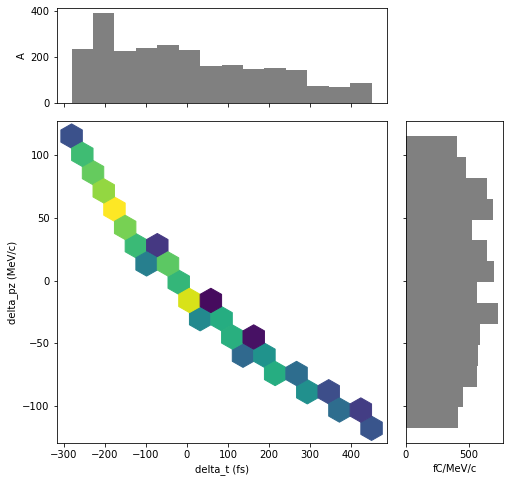

In [23]:
P.plot('delta_t', 'delta_pz', figsize=(8,8))

In [24]:
P['mean_energy'], P.units('mean_energy')

(5816222919.62755, pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

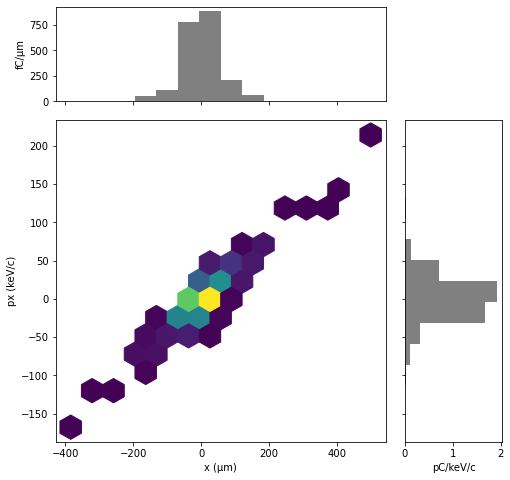

In [25]:
P.plot('x', 'px', figsize=(8,8))

In [26]:
P2=P.where(P.x < P['mean_x'])

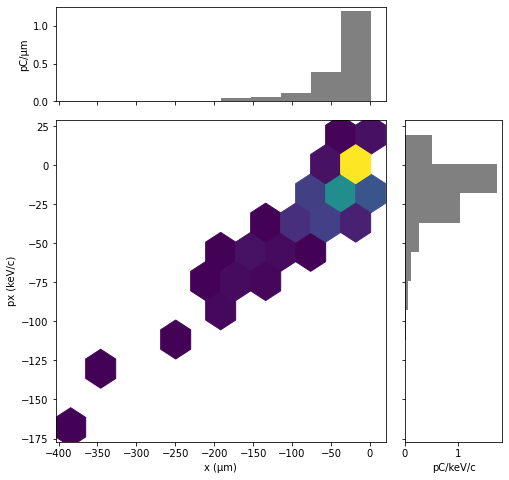

In [27]:
P2.plot('x', 'px', figsize=(8,8))